# Introduction
This analysis will delve into the world of Animal Crossing: New Horizons, a popular video game developed and published by Nintendo. We will try to understand the various factors that contribute to the popularity of the game's characters, known as villagers, among the player base.

Here are the villager attributes we will be looking at to see how they correlate with their popularity:

- Species
- Gender
- Personality
- Hobbies
- Requests (unique requests/desires expressed by each villager in the game)
- Song (song associated with the character)

# Importing necessary libraries

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leesa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data
Three datasets are used in this project:

1. Villager Popularity Data (CSV file)

2. Paradise Planning Data (CSV file)

3. Villager Data (API)

In [2]:
# read CSV file 1 which has villager popularity ratings
popularity = pd.read_csv('data/acnh_villager_data.csv')

# display first 5 rows of popularity data to examine
popularity.head()

,tier,rank,name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha


In [3]:
# read CSV file 2 with paradise planning data for each villager
paradise = pd.read_csv('data/Paradise Planning.csv')

# display first 5 rows to examine data
paradise.head()

,Name,Filename,Request,Thought bubble,Song,Furniture List,Furniture Name List,Unique Entry ID
0,Ace,brd09,The Fishin' Hole,I want a place where I can fish to my heart's ...,To the Edge,3064;13637;13347,cooler box;outdoor folding chair;yacht,yrzvoz4kNmqN8N2pX
1,Admiral,brd06,Cool Country Cabin,I want a cool cabin where I can relax on hot d...,K.K. Rally,2736;2326;5979,retro fan;water pump;bamboo noodle slide,2dKeMSMjBLekssvwo
2,Agent S,squ05,Training Grounds for a Hero,"Heroes train! It's what they do, even on vacat...",Go K.K. Rider,7653;4015;4078,speed bag;shower booth;barbell,EN7dGxBHogyTYD4pS
3,Agnes,pig17,The Artsiest Art Museum,I want a place that's like a museum with artsy...,K.K. Fugue,1712;13255;13302,poster stand;elaborate display case;decorative...,pmmgTrYA9hvoj2v9b
4,Al,gor08,Gymnastics School for Kids,My dream is to someday teach gymnastics to kids.,K.K. Étude,12701;13188;7845,school locker;ball catcher;pull-up-bar stand,XKm6cmQjf4eFAHMRT


In [4]:
# retrieve villagers data from the API
response = requests.get('https://acnhapi.com/v1/villagers')

In [5]:
# convert villagers data into JSON format
data = response.json()

# print the keys to understand structure
print(data.keys())

dict_keys(['ant00', 'ant01', 'ant02', 'ant03', 'ant06', 'ant08', 'ant09', 'bea00', 'bea01', 'bea02', 'bea03', 'bea05', 'bea06', 'bea07', 'bea08', 'bea09', 'bea10', 'bea11', 'bea12', 'bea13', 'bea14', 'bea15', 'brd00', 'brd01', 'brd02', 'brd03', 'brd04', 'brd05', 'brd06', 'brd08', 'brd11', 'brd15', 'brd16', 'brd17', 'brd18', 'bul00', 'bul01', 'bul03', 'bul05', 'bul07', 'bul08', 'cat00', 'cat01', 'cat02', 'cat03', 'cat04', 'cat05', 'cat06', 'cat07', 'cat08', 'cat09', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat23', 'cbr00', 'cbr01', 'cbr02', 'cbr03', 'cbr04', 'cbr05', 'cbr06', 'cbr07', 'cbr09', 'cbr10', 'cbr13', 'cbr14', 'cbr15', 'cbr16', 'cbr17', 'cbr19', 'chn00', 'chn01', 'chn02', 'chn05', 'chn09', 'chn10', 'chn11', 'chn12', 'chn13', 'cow00', 'cow01', 'cow06', 'cow07', 'crd00', 'crd01', 'crd02', 'crd04', 'crd06', 'crd07', 'crd08', 'der00', 'der01', 'der02', 'der03', 'der04', 'der05', 'der06', 'der07', 'der08', 'der09',

# Clean data, merge, and calculate new values

## Clean

### Villagers
The villagers data needs to be converted into a dataframe. 

In [6]:
# initialize empty list to store villager data
data_list = []

# loop through each key
for key in data.keys():
    # get the data for each villager using key
    villager_data = data[key]
    
    # convert the data for the villager into a dataframe
    villager_df = pd.json_normalize(villager_data)
    
    # append the dataframe to data_list
    data_list.append(villager_df)
    
#concatenate all dataframes in the list into a single villagers dataframe
villagers = pd.concat(data_list, ignore_index=True)

In [7]:
# display first 5 rows of villagers data to examine
villagers.head()

,id,file-name,personality,birthday-string,birthday,species,gender,subtype,hobby,catch-phrase,...,catch-translations.catch-USes,catch-translations.catch-EUfr,catch-translations.catch-USfr,catch-translations.catch-EUit,catch-translations.catch-EUnl,catch-translations.catch-CNzh,catch-translations.catch-TWzh,catch-translations.catch-JPja,catch-translations.catch-KRko,catch-translations.catch-EUru
0,1,ant00,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,...,achús,ATCHOUM,ATCHOUM,ett-CCIÙ,ha-TSJOE,有的,有的,でごわす,임돠,апчхи
1,2,ant01,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,...,fufuf,pouet,pouet,honk,snuit,真诚,真誠,ホントに,진짜로,го-го-го
2,3,ant02,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,...,snuf-snuf,pouuuuuf,pouuuuuf,snuuf,snufffff,希希,希希,だっしー,라지요,снуф-снуф
3,4,ant03,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,...,fa-fiú,grognon,grognon,snorty,snork,真的假的,真的假的,マジでー,정말,хрум-хрум
4,5,ant06,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,...,sniff,snif snif,snif snif,sniffff,snuifff,麻烦了,麻煩了,たもれ,추릅,шмыг


Next, the villagers dataframe will be cleaned by performing the following steps:
1. Examine the column names and  remove any columns that are not relevant to our analysis.
2. Rearrange the columns for better readability.
3. Convert column names to title case for consistency.
4. Rename the column containing the names of the villagers to 'Name'.
5. In the 'Personality' column, replace the term 'Uchi' with 'Big Sister' to better reflect the English translation of this personality type."

In [8]:
# print column names from villagers data to see which columns are not needed
print(villagers.columns)

Index(['id', 'file-name', 'personality', 'birthday-string', 'birthday',
       'species', 'gender', 'subtype', 'hobby', 'catch-phrase', 'icon_uri',
       'image_uri', 'bubble-color', 'text-color', 'saying', 'name.name-USen',
       'name.name-EUen', 'name.name-EUde', 'name.name-EUes', 'name.name-USes',
       'name.name-EUfr', 'name.name-USfr', 'name.name-EUit', 'name.name-EUnl',
       'name.name-CNzh', 'name.name-TWzh', 'name.name-JPja', 'name.name-KRko',
       'name.name-EUru', 'catch-translations.catch-USen',
       'catch-translations.catch-EUen', 'catch-translations.catch-EUde',
       'catch-translations.catch-EUes', 'catch-translations.catch-USes',
       'catch-translations.catch-EUfr', 'catch-translations.catch-USfr',
       'catch-translations.catch-EUit', 'catch-translations.catch-EUnl',
       'catch-translations.catch-CNzh', 'catch-translations.catch-TWzh',
       'catch-translations.catch-JPja', 'catch-translations.catch-KRko',
       'catch-translations.catch-EUru'],


In [9]:
# DROP UNNEEDED COLUMNS IN VILLAGERS DATAFRAME
# define list of column names to drop from the villagers dataframe
columns_to_drop = ['file-name', 'birthday-string', 'birthday', 'subtype', 'catch-phrase', 'bubble-color', 'text-color', 'saying', 'icon_uri', 'image_uri', 'name.name-EUen', 'name.name-EUde', 'name.name-EUes', 'name.name-USes',
       'name.name-EUfr', 'name.name-USfr', 'name.name-EUit', 'name.name-EUnl',
       'name.name-CNzh', 'name.name-TWzh', 'name.name-JPja', 'name.name-KRko',
       'name.name-EUru', 'catch-translations.catch-USen',
       'catch-translations.catch-EUen', 'catch-translations.catch-EUde',
       'catch-translations.catch-EUes', 'catch-translations.catch-USes',
       'catch-translations.catch-EUfr', 'catch-translations.catch-USfr',
       'catch-translations.catch-EUit', 'catch-translations.catch-EUnl',
       'catch-translations.catch-CNzh', 'catch-translations.catch-TWzh',
       'catch-translations.catch-JPja', 'catch-translations.catch-KRko',
       'catch-translations.catch-EUru']

# drop the columns from the villagers dataframe
villagers = villagers.drop(columns=columns_to_drop)

# display the first 5 rows to verify the columns were dropped
villagers.head()

,id,personality,species,gender,hobby,name.name-USen
0,1,Cranky,Anteater,Male,Education,Cyrano
1,2,Jock,Anteater,Male,Fitness,Antonio
2,3,Peppy,Anteater,Female,Fashion,Pango
3,4,Peppy,Anteater,Female,Fashion,Anabelle
4,5,Snooty,Anteater,Female,Education,Snooty


In [10]:
# move column with names of villagers to the second column
villagers.insert(1, 'name.name-USen', villagers.pop('name.name-USen'))

# display the first 5 rows to verify the column was moved
villagers.head()

,id,name.name-USen,personality,species,gender,hobby
0,1,Cyrano,Cranky,Anteater,Male,Education
1,2,Antonio,Jock,Anteater,Male,Fitness
2,3,Pango,Peppy,Anteater,Female,Fashion
3,4,Anabelle,Peppy,Anteater,Female,Fashion
4,5,Snooty,Snooty,Anteater,Female,Education


In [11]:
# change all column names in villagers data to title case
villagers.columns = villagers.columns.str.title()

# display the first 5 rows to verify
villagers.head()

,Id,Name.Name-Usen,Personality,Species,Gender,Hobby
0,1,Cyrano,Cranky,Anteater,Male,Education
1,2,Antonio,Jock,Anteater,Male,Fitness
2,3,Pango,Peppy,Anteater,Female,Fashion
3,4,Anabelle,Peppy,Anteater,Female,Fashion
4,5,Snooty,Snooty,Anteater,Female,Education


In [12]:
# rename 'Name.name-USen' column to 'Name' in villagers data
villagers = villagers.rename(columns={'Name.Name-Usen': 'Name'})

# display the first 15 rows to verify
villagers.head(15)

,Id,Name,Personality,Species,Gender,Hobby
0,1,Cyrano,Cranky,Anteater,Male,Education
1,2,Antonio,Jock,Anteater,Male,Fitness
2,3,Pango,Peppy,Anteater,Female,Fashion
3,4,Anabelle,Peppy,Anteater,Female,Fashion
4,5,Snooty,Snooty,Anteater,Female,Education
5,6,Annalisa,Normal,Anteater,Female,Nature
6,7,Olaf,Smug,Anteater,Male,Education
7,8,Teddy,Jock,Bear,Male,Fitness
8,9,Pinky,Peppy,Bear,Female,Fashion
9,10,Curt,Cranky,Bear,Male,Nature


In [13]:
# replace the term 'Uchi' with 'Big sister' in the 'Personality' column 
villagers['Personality'] = villagers['Personality'].replace('Uchi', 'Big sister')

# display the first 15 rows to verify
villagers.head(15)

,Id,Name,Personality,Species,Gender,Hobby
0,1,Cyrano,Cranky,Anteater,Male,Education
1,2,Antonio,Jock,Anteater,Male,Fitness
2,3,Pango,Peppy,Anteater,Female,Fashion
3,4,Anabelle,Peppy,Anteater,Female,Fashion
4,5,Snooty,Snooty,Anteater,Female,Education
5,6,Annalisa,Normal,Anteater,Female,Nature
6,7,Olaf,Smug,Anteater,Male,Education
7,8,Teddy,Jock,Bear,Male,Fitness
8,9,Pinky,Peppy,Bear,Female,Fashion
9,10,Curt,Cranky,Bear,Male,Nature


In [14]:
# display the summary of the villagers dataframe
villagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           391 non-null    int64 
 1   Name         391 non-null    object
 2   Personality  391 non-null    object
 3   Species      391 non-null    object
 4   Gender       391 non-null    object
 5   Hobby        391 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.5+ KB


### Popularity

Then, the popularity dataframe will be cleaned by converting column names to title case for consistency.

In [15]:
# change all column names in popularity data to title case
popularity.columns = popularity.columns.str.title()

# display the first 15 rows to verify
popularity.head()

,Tier,Rank,Name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha


In [16]:
# display the summary of the popularity dataframe
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier    413 non-null    int64 
 1   Rank    413 non-null    int64 
 2   Name    413 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


### Paradise planning

The paradise planning data will be cleaned by examining the column names and removing any columns that are not relevant to our analysis.

In [17]:
paradise.head()

,Name,Filename,Request,Thought bubble,Song,Furniture List,Furniture Name List,Unique Entry ID
0,Ace,brd09,The Fishin' Hole,I want a place where I can fish to my heart's ...,To the Edge,3064;13637;13347,cooler box;outdoor folding chair;yacht,yrzvoz4kNmqN8N2pX
1,Admiral,brd06,Cool Country Cabin,I want a cool cabin where I can relax on hot d...,K.K. Rally,2736;2326;5979,retro fan;water pump;bamboo noodle slide,2dKeMSMjBLekssvwo
2,Agent S,squ05,Training Grounds for a Hero,"Heroes train! It's what they do, even on vacat...",Go K.K. Rider,7653;4015;4078,speed bag;shower booth;barbell,EN7dGxBHogyTYD4pS
3,Agnes,pig17,The Artsiest Art Museum,I want a place that's like a museum with artsy...,K.K. Fugue,1712;13255;13302,poster stand;elaborate display case;decorative...,pmmgTrYA9hvoj2v9b
4,Al,gor08,Gymnastics School for Kids,My dream is to someday teach gymnastics to kids.,K.K. Étude,12701;13188;7845,school locker;ball catcher;pull-up-bar stand,XKm6cmQjf4eFAHMRT


In [18]:
# DROP UNNEEDED COLUMNS IN PARADISE DATAFRAME
# drop the columns from the villagers dataframe
paradise = paradise.drop(columns=['Filename', 'Thought bubble','Furniture List', 'Furniture Name List', 'Unique Entry ID'])

# display the first five rows to verify the columns were dropped
paradise.head()

,Name,Request,Song
0,Ace,The Fishin' Hole,To the Edge
1,Admiral,Cool Country Cabin,K.K. Rally
2,Agent S,Training Grounds for a Hero,Go K.K. Rider
3,Agnes,The Artsiest Art Museum,K.K. Fugue
4,Al,Gymnastics School for Kids,K.K. Étude


In [19]:
# display the summary of the paradise dataframe
paradise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     413 non-null    object
 1   Request  413 non-null    object
 2   Song     413 non-null    object
dtypes: object(3)
memory usage: 9.8+ KB


### Data Consistency

In this section, we will ensure that the villager names across all dataframes are consistent, which is necessary for the subsequent merging of the dataframes. The steps involved are as follows:

1. Identifying and resolving discrepancies in villager names across the dataframes. 
2. Removing entries for villagers that are not present in all dataframes. 

In [20]:
# count the number of names in the villagers dataframe that are also present in the popularity dataframe
villagers['Name'].isin(popularity['Name']).sum()

386

There are 391 entries in the villagers dataframe. Since only 386 names are present in both the villagers dataframe and the popularity dataframe, there are 5 that don't match. Those five names can be adjusted to match exactly. 

In [21]:
# find names in villagers dataframe that are not in popularity dataframe
mismatched_names_villagers = villagers[~villagers['Name'].isin(popularity['Name'])]['Name']
mismatched_names_villagers

159    Wart Jr.
204        Buck
306       Spork
331      O'Hare
341       Renée
Name: Name, dtype: object

In [22]:
# find names in popularity dataframe that are not in villagers dataframe
mismatched_names_popularity = popularity[~popularity['Name'].isin(villagers['Name'])]['Name']
mismatched_names_popularity

2               Shino
4               Sasha
5                Ione
25         Cephalobot
57             Étoile
84          Tiansheng
105             Petri
108             Quinn
114             Marlo
116              Chai
146            Azalea
158             Faith
170          Chabwick
202            WartJr
212               Rio
216       Buck(Brows)
222             Renee
224           Chelsea
226             Marty
229           Roswell
261               Zoe
287             OHare
300    Crackle(Spork)
323               Ace
328              Toby
341             Frett
399             Rilla
Name: Name, dtype: object

In [23]:
# change names in popularity dataframe to match names in villagers dataframe
popularity['Name'] = popularity['Name'].replace(['WartJr'],"Wart Jr.")
popularity['Name'] = popularity['Name'].replace(['Buck(Brows)'],"Buck")
popularity['Name'] = popularity['Name'].replace(['Crackle(Spork)'],"Spork")
popularity['Name'] = popularity['Name'].replace(['OHare'],"O\'Hare")
popularity['Name'] = popularity['Name'].replace(['Renee'],"Renée")

There are 391 entries in the villagers dataframe and 413 in the popularity dataframe. We will remove the names in the popularity dataframe that aren't in the villagers dataframe to fascilitate merging. 

In [24]:
# keep only rows in popularity where the Name is also present in villagers
popularity = popularity[popularity['Name'].isin(villagers['Name'])]

#check number of remaining rows to see if it matches villagers(391)
popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier    391 non-null    int64 
 1   Rank    391 non-null    int64 
 2   Name    391 non-null    object
dtypes: int64(2), object(1)
memory usage: 12.2+ KB


In [25]:
# count the number of names in the villagers dataframe that are also present in the paradise dataframe
villagers['Name'].isin(paradise['Name']).sum()

391

There are no names in the villagers dataframe that are not also present in the paradise dataframe. 
We'll check how many names in the paradise dataframe don't match those in the villagers dataframe.

In [26]:
# Check which names in the paradise dataframe are not in the villagers dataframe
not_in_villagers = ~paradise['Name'].isin(villagers['Name'])

# Count the number of such rows
num_not_in_villagers = not_in_villagers.sum()

num_not_in_villagers

22

We'll remove the names in the paradise dataframe that are not present in the villagers dataframe to faciliate merging.

In [27]:
# keep only rows in paradise dataframe where the Name is also present in villagers
paradise = paradise[paradise['Name'].isin(villagers['Name'])]

#check number of remaining rows to see if it matches villagers(391)
paradise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1 to 412
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     391 non-null    object
 1   Request  391 non-null    object
 2   Song     391 non-null    object
dtypes: object(3)
memory usage: 12.2+ KB


## Merge

In [28]:
# merge villagers dataframe and popularity dataframe on the column Name
merged_df = villagers.merge(popularity, on='Name', how='inner')
merged_df.head()

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank
0,1,Cyrano,Cranky,Anteater,Male,Education,6,125
1,2,Antonio,Jock,Anteater,Male,Fitness,5,1
2,3,Pango,Peppy,Anteater,Female,Fashion,6,25
3,4,Anabelle,Peppy,Anteater,Female,Fashion,6,4
4,5,Snooty,Snooty,Anteater,Female,Education,6,103


In [29]:
# merge the merged dataframe and paradise dataframe on the column Name
final_merged_df = merged_df.merge(paradise, on='Name', how='inner')
final_merged_df.head()

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song
0,1,Cyrano,Cranky,Anteater,Male,Education,6,125,Construction Job Site,Agent K.K.
1,2,Antonio,Jock,Anteater,Male,Fitness,5,1,A Simple Stronghold,Space K.K.
2,3,Pango,Peppy,Anteater,Female,Fashion,6,25,Ultimate Beauty Salon,K.K. Oasis
3,4,Anabelle,Peppy,Anteater,Female,Fashion,6,4,Anabelle's Gathering Garden,K.K. Calypso
4,5,Snooty,Snooty,Anteater,Female,Education,6,103,Snooty's Indoor Swim Club,Aloha K.K.


In [30]:
# display summary of merged dataframe
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           391 non-null    int64 
 1   Name         391 non-null    object
 2   Personality  391 non-null    object
 3   Species      391 non-null    object
 4   Gender       391 non-null    object
 5   Hobby        391 non-null    object
 6   Tier         391 non-null    int64 
 7   Rank         391 non-null    int64 
 8   Request      391 non-null    object
 9   Song         391 non-null    object
dtypes: int64(3), object(7)
memory usage: 33.6+ KB


In [31]:
# check to make sure all the names are unique
unique_names = final_merged_df['Name'].nunique()
unique_names

391

## Calculate new values

### Overall ranking
In this section, we'll sort the dataframe by the 'Tier' and 'Rank' columns and create a column for 'Overall_Ranking.' This will give each villager an overall ranking based on their position in the sorted dataframe.

In [32]:
# sort merged dataframe by the 'tier' and 'rank' columns
final_merged_df.sort_values(['Tier', 'Rank'], inplace=True)
final_merged_df

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song
63,64,Raymond,Smug,Cat,Male,Nature,1,1,A Home Tailored for Me,K.K. Break
371,372,Marshal,Smug,Squirrel,Male,Music,1,2,Retro Café Cabin,K.K. Swing
179,180,Sherb,Lazy,Goat,Male,Nature,1,4,My Fantasy Theme Park,My Place
60,61,Ankha,Snooty,Cat,Female,Nature,1,7,Ancient Oasis,K.K. Bazaar
268,269,Zucker,Lazy,Octopus,Male,Nature,1,8,Festival Grounds,Spring Blossoms
...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,Cranky,Hippo,Male,Education,6,159,Rocco's Danger Zone,Surfin' K.K.
262,263,Bettina,Normal,Mouse,Female,Education,6,160,A Peerless Patisserie,Café K.K.
308,309,Boris,Cranky,Pig,Male,Nature,6,161,A Music Producer's Home,K.K. Technopop
201,202,Bitty,Snooty,Hippo,Female,Education,6,162,My Fashion-Mag Office,K.K. Moody


In [33]:
# create new column called 'overall_ranking'
final_merged_df['Overall_Ranking'] = np.arange(1, len(final_merged_df)+1)
final_merged_df

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song,Overall_Ranking
63,64,Raymond,Smug,Cat,Male,Nature,1,1,A Home Tailored for Me,K.K. Break,1
371,372,Marshal,Smug,Squirrel,Male,Music,1,2,Retro Café Cabin,K.K. Swing,2
179,180,Sherb,Lazy,Goat,Male,Nature,1,4,My Fantasy Theme Park,My Place,3
60,61,Ankha,Snooty,Cat,Female,Nature,1,7,Ancient Oasis,K.K. Bazaar,4
268,269,Zucker,Lazy,Octopus,Male,Nature,1,8,Festival Grounds,Spring Blossoms,5
...,...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,Cranky,Hippo,Male,Education,6,159,Rocco's Danger Zone,Surfin' K.K.,387
262,263,Bettina,Normal,Mouse,Female,Education,6,160,A Peerless Patisserie,Café K.K.,388
308,309,Boris,Cranky,Pig,Male,Nature,6,161,A Music Producer's Home,K.K. Technopop,389
201,202,Bitty,Snooty,Hippo,Female,Education,6,162,My Fashion-Mag Office,K.K. Moody,390


In [34]:
# move the 'Overall_Ranking' column to after the Rank column
final_merged_df.insert(8, 'Overall_Ranking', final_merged_df.pop('Overall_Ranking'))
final_merged_df

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank,Overall_Ranking,Request,Song
63,64,Raymond,Smug,Cat,Male,Nature,1,1,1,A Home Tailored for Me,K.K. Break
371,372,Marshal,Smug,Squirrel,Male,Music,1,2,2,Retro Café Cabin,K.K. Swing
179,180,Sherb,Lazy,Goat,Male,Nature,1,4,3,My Fantasy Theme Park,My Place
60,61,Ankha,Snooty,Cat,Female,Nature,1,7,4,Ancient Oasis,K.K. Bazaar
268,269,Zucker,Lazy,Octopus,Male,Nature,1,8,5,Festival Grounds,Spring Blossoms
...,...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,Cranky,Hippo,Male,Education,6,159,387,Rocco's Danger Zone,Surfin' K.K.
262,263,Bettina,Normal,Mouse,Female,Education,6,160,388,A Peerless Patisserie,Café K.K.
308,309,Boris,Cranky,Pig,Male,Nature,6,161,389,A Music Producer's Home,K.K. Technopop
201,202,Bitty,Snooty,Hippo,Female,Education,6,162,390,My Fashion-Mag Office,K.K. Moody


### Species

#### Villagers in Each Tier

In [35]:
# count number of villagers from each species in each popularity tier
tier_counts = final_merged_df.groupby(['Species', 'Tier']).size().unstack(fill_value=0)
print("\nCount of Villagers in Each Tier by Species:\n", tier_counts)


Count of Villagers in Each Tier by Species:
 Tier       1  2  3  4   5   6
Species                      
Alligator  0  0  0  2   1   4
Anteater   0  0  0  0   3   4
Bear       0  0  0  3   3   9
Bird       0  0  0  0   3  10
Bull       0  0  0  0   2   4
Cat        2  6  4  4   5   2
Chicken    0  0  0  0   4   5
Cow        0  0  0  0   3   1
Cub        3  1  1  2   5   4
Deer       1  3  3  3   0   0
Dog        0  2  3  4   4   3
Duck       0  2  0  3   3   9
Eagle      0  1  0  0   3   5
Elephant   0  0  1  2   3   5
Frog       0  1  1  1   8   7
Goat       1  0  2  2   0   3
Gorilla    0  0  0  0   1   8
Hamster    0  0  3  1   2   2
Hippo      0  0  0  0   2   5
Horse      0  1  1  1   4   8
Kangaroo   0  0  0  0   3   5
Koala      0  0  1  3   5   0
Lion       0  0  0  1   1   5
Monkey     0  0  0  1   4   3
Mouse      0  0  0  1   4  10
Octopus    2  0  1  0   0   0
Ostrich    0  1  0  2   4   3
Penguin    0  1  0  4   4   4
Pig        0  0  0  1   1  13
Rabbit     1  0  2  3  1

This table presents the count of villagers in each tier, grouped by species. The tiers range from 1 to 6, with 1 being the highest (most popular) and 6 being the lowest (least popular). Each cell in the table represents the number of villagers of a particular species that fall into a specific tier.

For instance, there are 3 cubs in tier 1, which means that there are 3 cub villagers who are among the most popular. On the other hand, there are 13 pigs in tier 6, indicating that pig villagers tend to be less popular.

Some species, like the Octopus, have a strong presence in the top tiers (2 in tier 1), but no presence in the lower tiers. This suggests that Octopus villagers are generally more popular. Conversely, species like the Pig and Mouse have a strong presence in the lower tiers (13 and 10 in tier 6, respectively), suggesting that these species are generally less popular.

In some cases, a species has a fairly even distribution across the tiers, such as the Penguin and Dog species. This suggests a mixed popularity among villagers of these species.

#### Average Popularity Ranking

In [36]:
# calculate the mean popularity ranking for each species and sort so most popular are at the top
mean_popularity_species = final_merged_df.groupby('Species')['Overall_Ranking'].mean().sort_values()
print("Average Popularity Ranking by Species:\n", mean_popularity_species)

Average Popularity Ranking by Species:
 Species
Octopus       17.333333
Deer          52.300000
Wolf          72.636364
Cat           94.521739
Koala        134.111111
Dog          139.750000
Cub          143.187500
Hamster      147.250000
Squirrel     148.611111
Rhino        155.333333
Goat         162.500000
Rabbit       162.700000
Penguin      186.923077
Ostrich      187.500000
Frog         199.000000
Sheep        199.538462
Elephant     205.181818
Cow          205.500000
Monkey       214.500000
Duck         216.941176
Tiger        217.714286
Alligator    221.857143
Horse        231.600000
Anteater     233.714286
Lion         235.428571
Bear         241.333333
Eagle        243.444444
Chicken      255.000000
Bull         267.333333
Bird         277.538462
Kangaroo     278.625000
Hippo        285.571429
Mouse        287.266667
Pig          305.600000
Gorilla      308.555556
Name: Overall_Ranking, dtype: float64


This table presents the average popularity ranking for each species of villagers. The popularity ranking is a numerical value, with a lower number indicating higher popularity.

The Octopus species has the highest average popularity ranking, with a value of 17.33, suggesting that Octopus villagers are generally the most popular among players. On the other hand, the Gorilla species has the lowest average popularity ranking, with a value of 308.56, indicating that Gorilla villagers are generally the least popular.

Species like the Deer, Wolf, and Cat also have relatively high average popularity rankings (52.3, 72.64, and 94.52 respectively), suggesting that these species are also quite popular among players.

Conversely, species like the Pig, Mouse, and Hippo have relatively low average popularity rankings (305.6, 287.27, and 285.57 respectively), suggesting that these species are less popular.

It's important to note that these are average values, so there may be individual villagers within each species that deviate from these averages. However, these values provide a general idea of the relative popularity of each species.

#### Popularity Range
A larger range indicates a greater spread in popularity rankings within that species.

In [37]:
# calculate the range of popularity rankings (max - min) for each species. 
popularity_range = final_merged_df.groupby('Species')['Overall_Ranking'].max() - final_merged_df.groupby('Species')['Overall_Ranking'].min()

# sort the popularity range in descending order
popularity_range = popularity_range.sort_values(ascending=False)

print("\nPopularity Range by Species:\n", popularity_range)


Popularity Range by Species:
 Species
Goat         388
Duck         368
Squirrel     362
Penguin      349
Ostrich      345
Horse        345
Elephant     339
Sheep        338
Eagle        327
Dog          326
Cub          316
Hamster      313
Rabbit       313
Frog         306
Pig          299
Cat          297
Bear         281
Lion         278
Alligator    278
Mouse        274
Monkey       257
Tiger        243
Hippo        235
Chicken      234
Anteater     233
Rhino        228
Bird         223
Cow          213
Gorilla      159
Koala        157
Kangaroo     154
Bull         148
Wolf         125
Deer          89
Octopus       34
Name: Overall_Ranking, dtype: int32


This table presents the range of popularity rankings for each species of villagers. The popularity ranking is a numerical value, with a lower number indicating higher popularity. The range is calculated as the difference between the highest and lowest popularity rankings within each species.

The Goat species has the widest range of popularity rankings, with a value of 388. This suggests that there is a significant variation in popularity among Goat villagers, with some being highly popular and others being less so.

On the other hand, the Octopus species has the narrowest range of popularity rankings, with a value of 34. This suggests that the popularity of Octopus villagers is relatively consistent, with less variation compared to other species.

Species like the Duck, Squirrel, and Penguin also have wide ranges of popularity rankings (368, 362, and 349 respectively), indicating significant variation in popularity within these species.

Conversely, species like the Bull, Wolf, and Deer have relatively narrow ranges of popularity rankings (148, 125, and 89 respectively), suggesting less variation in popularity within these species.

These ranges provide an idea of the diversity in popularity within each species. A wider range suggests a greater disparity in popularity among villagers of the same species, while a narrower range suggests more uniform popularity.

#### Proportion of Villagers in the Top Tier
This will show the proportion of villagers from each species that are in the top popularity tier (Tier 1). A higher proportion indicates that a larger fraction of the species' villagers are highly popular. There are some species with no villagers in the top tier. These will be replaced by 0.

In [38]:
# calculate the proportion of villagers from each species that are in the top popularity tier (Tier 1). 
top_tier_proportion = final_merged_df[final_merged_df['Tier'] == 1].groupby('Species').size() / final_merged_df.groupby('Species').size()

top_tier_proportion = top_tier_proportion.sort_values()

# for species with no villagers in top tier, replace with 0
top_tier_proportion = top_tier_proportion.fillna(0)

print("\nProportion of Villagers in the Top Tier by Species:\n", top_tier_proportion)


Proportion of Villagers in the Top Tier by Species:
 Species
Rabbit       0.050000
Squirrel     0.055556
Cat          0.086957
Deer         0.100000
Goat         0.125000
Rhino        0.166667
Cub          0.187500
Octopus      0.666667
Alligator    0.000000
Anteater     0.000000
Bear         0.000000
Bird         0.000000
Bull         0.000000
Chicken      0.000000
Cow          0.000000
Dog          0.000000
Duck         0.000000
Eagle        0.000000
Elephant     0.000000
Frog         0.000000
Gorilla      0.000000
Hamster      0.000000
Hippo        0.000000
Horse        0.000000
Kangaroo     0.000000
Koala        0.000000
Lion         0.000000
Monkey       0.000000
Mouse        0.000000
Ostrich      0.000000
Penguin      0.000000
Pig          0.000000
Sheep        0.000000
Tiger        0.000000
Wolf         0.000000
dtype: float64


The table shows the proportion of villagers in the top tier (Tier 1) for each species.

The 'Octopus' species has the highest proportion of villagers in the top tier, with about 67% of its villagers being in Tier 1. This suggests that octopus villagers are generally more popular among players.

The 'Cub' species has the second highest proportion of villagers in the top tier, with about 19% of its villagers being in Tier 1.

The 'Rhino' species has the third highest proportion of villagers in the top tier, with about 17% of its villagers being in Tier 1.

The 'Goat' species has about 13% of its villagers in the top tier, and the 'Deer' species has about 10% of its villagers in the top tier.

The 'Cat', 'Squirrel', and 'Rabbit' species have smaller proportions of villagers in the top tier, ranging from about 5% to 9%.

The other speices have no villagers in the top tier. This suggests that villagers of these species are generally less popular among players.

### Gender

#### Total Number of Male Villagers and Female Villagers

In [39]:
# count number of villagers for each gender
final_merged_df['Gender'].value_counts()

Male      204
Female    187
Name: Gender, dtype: int64

In [40]:
# group the data by gender
grouped = final_merged_df.groupby('Gender')

#### Average Ranking for Each Gender

In [41]:
# calculate mean ranking for each gender
mean_ranking = grouped['Overall_Ranking'].mean()
print("Mean Ranking:\n", mean_ranking)

Mean Ranking:
 Gender
Female    180.283422
Male      210.406863
Name: Overall_Ranking, dtype: float64


This data represents the average popularity ranking for villagers based on their gender. The lower the ranking, the more popular the villager is.

Female villagers have an average popularity ranking of approximately 180.28, which indicates that they are generally more popular than male villagers, who have an average popularity ranking of approximately 210.41.

#### Standard Deviation of Rankings for Each Gender

In [42]:
# calculate standard deviation fo rankings for each gender
std_dev_rankings = grouped['Overall_Ranking'].std()
print("\nStandard Deviation of Rankings:\n", std_dev_rankings)


Standard Deviation of Rankings:
 Gender
Female    115.232070
Male      109.252255
Name: Overall_Ranking, dtype: float64


The standard deviation values represent the amount of variation or dispersion in the popularity rankings for each gender category.

For female villagers, the standard deviation in popularity ranking is approximately 115.23. This means that the popularity rankings for female villagers vary, on average, by about 115.23 points from the mean popularity ranking.

For male villagers, the standard deviation in popularity ranking is approximately 109.25. This means that the popularity rankings for male villagers vary, on average, by about 109.25 points from the mean popularity ranking.

The slightly higher standard deviation for female villagers indicates a slightly wider distribution of popularity rankings for female villagers compared to male villagers.

### Personality

#### Villagers Per Personality TYpe

In [43]:
# count the number of villagers for each personality type
villager_count_by_personality = final_merged_df['Personality'].value_counts()
villager_count_by_personality

Lazy          60
Normal        59
Snooty        55
Jock          55
Cranky        55
Peppy         49
Smug          34
Big sister    24
Name: Personality, dtype: int64

The table shows the count of villagers per personality type. 'Lazy' is the most common personality with 60 villagers, followed closely by 'Normal' with 59 villagers. The least common personality is 'Big sister', represented by only 24 villagers.

#### Average Ranking Per Personality Type

In [44]:
# Calculate the average popularity ranking for each personality type
avg_popularity_by_personality = final_merged_df.groupby('Personality')['Overall_Ranking'].mean().sort_values()
avg_popularity_by_personality

Personality
Big sister    151.083333
Normal        151.423729
Peppy         157.183673
Lazy          183.833333
Smug          191.852941
Jock          223.381818
Cranky        237.890909
Snooty        244.563636
Name: Overall_Ranking, dtype: float64

The table presents the average popularity ranking for each personality type. 'Big sister' and 'Normal' personality types are the most popular among villagers, with average rankings of 151.08 and 151.42 respectively. On the other hand, 'Snooty' and 'Cranky' personality types are the least popular, with average rankings of 244.56 and 237.89 respectively. 'Jock', 'Smug', 'Lazy', and 'Peppy' personality types fall in the middle range of popularity.

#### Personality Distribution Across Tiers

In this section, we will examine the distribution of personality types across the different tiers. This will provide insights into whether certain personality types are more common in higher or lower tiers.

In [45]:
# Group the dataframe by 'Tier' and 'Personality', then count the number of villagers in each group
personality_counts = final_merged_df.groupby(['Tier', 'Personality'])['Name'].count()

# Convert the groupby object to a DataFrame
personality_counts_df = personality_counts.reset_index()

# Rename the 'Name' column to 'Count'
personality_counts_df.rename(columns={'Name': 'Count'}, inplace=True)

# Sort the DataFrame by 'Tier' and 'Count'
personality_counts_df = personality_counts_df.sort_values(['Tier', 'Count'], ascending=[True, False])

# Display the DataFrame
print(personality_counts_df)

    Tier Personality  Count
0      1        Lazy      4
1      1      Normal      4
2      1        Smug      2
3      1      Snooty      2
8      2      Normal      6
9      2       Peppy      6
7      2        Lazy      4
5      2      Cranky      2
6      2        Jock      2
10     2        Smug      2
4      2  Big sister      1
11     2      Snooty      1
16     3      Normal      8
12     3  Big sister      5
13     3      Cranky      4
17     3       Peppy      4
14     3        Jock      3
15     3        Lazy      2
18     3        Smug      2
19     3      Snooty      1
25     4       Peppy     10
23     4        Lazy      9
24     4      Normal      8
20     4  Big sister      6
26     4        Smug      6
27     4      Snooty      6
21     4      Cranky      5
22     4        Jock      5
31     5        Lazy     19
32     5      Normal     19
30     5        Jock     18
33     5       Peppy     16
35     5      Snooty     15
29     5      Cranky     13
28     5  Big sister

In Tier 1, the most common personality types are Lazy and Normal, each with 4 villagers. Smug and Snooty personality types are less common, with only 2 villagers each.

In Tier 2, the most common personality types are Normal and Peppy, each with 6 villagers. Big Sister, Cranky, Jock, Lazy, and Smug personality types have fewer villagers, ranging from 1 to 4.

In Tier 3, the Normal personality type is the most common with 8 villagers, followed by Big Sister with 5. The other personality types range from 1 to 4 villagers.

In Tier 4, the most common personality types are Lazy and Peppy, each with 9 and 10 villagers respectively. The other personality types range from 5 to 8 villagers.

In Tier 5, the most common personality types are Lazy, Normal, and Peppy, each with 16 to 19 villagers. The other personality types range from 5 to 15 villagers.

In Tier 6, the most common personality types are Lazy, Jock, Cranky, and Snooty, each with 22 to 31 villagers. The other personality types range from 4 to 17 villagers.

This analysis suggests that certain personality types, such as Normal and Peppy, are more common in higher tiers, while others, such as Jock, Cranky, and Snooty, are more common in lower tiers.

### Hobbies

#### Villagers Per Hobby

In [46]:
# count the number of villagers for each hobby
villager_count_by_hobby = final_merged_df['Hobby'].value_counts()
villager_count_by_hobby

Nature       66
Fitness      66
Fashion      66
Play         65
Music        64
Education    64
Name: Hobby, dtype: int64

The table shows the count of villagers for each hobby in the dataset. 'Nature', 'Fitness', and 'Fashion' are the most common hobbies among the villagers, each with 66 villagers. 'Play' is also a common hobby, with 65 villagers. 'Music' and 'Education' are the least common hobbies, each with 64 villagers. This suggests a fairly even distribution of hobbies among the villagers.

#### Average Ranking Per Hobby

In [47]:
# calculate the average popularity ranking for each hobby
avg_popularity_by_hobby = final_merged_df.groupby('Hobby')['Overall_Ranking'].mean().sort_values()
avg_popularity_by_hobby

Hobby
Nature       165.666667
Music        165.953125
Play         180.061538
Education    211.703125
Fashion      212.060606
Fitness      239.878788
Name: Overall_Ranking, dtype: float64

The table shows the average popularity ranking for each hobby among the villagers. 'Nature' and 'Music' hobbies have the lowest average popularity rankings, indicating that villagers with these hobbies are generally more popular.

On the other hand, 'Fitness' hobby has the highest average popularity ranking of approximately 239.88, indicating that villagers with this hobby are generally less popular. 'Fashion' and 'Education' hobbies also have relatively high average popularity rankings, approximately 212.06 and 211.70 respectively, suggesting that villagers with these hobbies are less popular compared to those with 'Nature' or 'Music' hobbies.

#### Villagers in Top Tier Per Hobby

In [48]:
# count the number of villagers in the tier 1 for each hobby
top_tier_villagers_by_hobby = final_merged_df[final_merged_df['Tier'] == 1]['Hobby'].value_counts()
top_tier_villagers_by_hobby

Nature       6
Music        3
Education    2
Play         1
Name: Hobby, dtype: int64

The table shows the count of villagers in the top tier (Tier 1) for each hobby. Villagers with the 'Nature' hobby have the highest representation in Tier 1, with 6 villagers. This suggests that the 'Nature' hobby is associated with high popularity among villagers.

The 'Music' hobby has the second highest representation in Tier 1, with 3 villagers. This also suggests a relatively high popularity for villagers with the 'Music' hobby.

On the other hand, the 'Education' hobby has only 2 villagers in Tier 1, and the 'Play' hobby has the least representation with only 1 villager in Tier 1. This suggests that these hobbies are less associated with high popularity among villagers.

### Requests

In [49]:
# Count the number of unique requests
num_unique_requests = final_merged_df['Request'].nunique()

# Print the result
print(f'There are {num_unique_requests} unique requests.')

There are 391 unique requests.


#### 20 Most Common Words in Requests

In [50]:
# Create a list of all words in the requests, making sure each request is a string
words = ' '.join(str(request) for request in final_merged_df['Request']).lower().split()

# Remove stopwords from the list of words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Count the 20 most common words
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

print(most_common_words)

[('home', 37), ('house', 20), ('place', 19), ('garden', 10), ('space', 10), ('café', 9), ('gym', 9), ('studio', 8), ('palace', 7), ('paradise', 7), ('secret', 6), ('sports', 6), ('cabin', 5), ('grounds', 5), ('full', 5), ('bungalow', 5), ('life', 5), ('manor', 5), ('hideaway', 5), ('field', 5)]


The list shows the 20 most common words found in the villagers' requests. These words can give us an idea of the most common themes or elements that villagers are interested in when making requests.

The word 'home' is the most common, appearing 37 times. This suggests that many villagers are interested in elements related to their homes or are making requests about their living spaces.

The word 'house' is the second most common, appearing 20 times, and 'place' is the third most common, appearing 19 times. These words further emphasize the importance of the living environment to the villagers.

Other common words include 'garden', 'space', 'café', and 'gym', which appear 10, 10, 9, and 9 times respectively. These words suggest that villagers are also interested in outdoor spaces, personal spaces, social spaces like cafes, and fitness areas like gyms.

The rest of the words in the list appear less frequently but still indicate common themes in the villagers' requests, such as 'studio', 'palace', 'paradise', 'secret', 'sports', 'cabin', 'grounds', 'full', 'bungalow', 'life', 'manor', 'hideaway', and 'field'.

#### Average Popularity for Each Common Word

In this section, we'll look at the relationship between the type of request and the popularity of the villager.

In [51]:
# Define the categories based on the most common words
categories = [word[0] for word in most_common_words]

# Create a new column for each category and check if the request contains the category word
for category in categories:
    final_merged_df[category] = final_merged_df['Request'].apply(lambda x: category in str(x).lower())

# Calculate the average popularity for each category
category_popularity = {}
for category in categories:
    category_popularity[category] = final_merged_df.loc[final_merged_df[category], 'Overall_Ranking'].mean()

category_popularity

{'home': 229.45,
 'house': 195.08695652173913,
 'place': 160.76190476190476,
 'garden': 227.0,
 'space': 210.1,
 'café': 184.11111111111111,
 'gym': 270.0,
 'studio': 214.25,
 'palace': 129.0,
 'paradise': 193.42857142857142,
 'secret': 229.33333333333334,
 'sports': 281.42857142857144,
 'cabin': 235.0,
 'grounds': 150.8,
 'full': 175.6,
 'bungalow': 237.8,
 'life': 197.28571428571428,
 'manor': 215.6,
 'hideaway': 234.0,
 'field': 224.4}

The 'palace' category has the lowest average popularity (which means higher popularity), with a score of 129. This suggests that villagers who request elements related to a 'palace' are generally more popular.

The 'place' category has the second lowest average popularity, with a score of 160.76. This suggests that villagers who request elements related to a 'place' are also quite popular.

The 'full' category has the third lowest average popularity, with a score of 175.6. This suggests that villagers who request elements related to being 'full' (perhaps in the context of a full house or a full garden) are also relatively popular.

On the other hand, the 'sports' category has the highest average popularity, with a score of 281.43. This suggests that villagers who request elements related to 'sports' are generally less popular.

Other categories such as 'home', 'house', 'garden', 'space', 'café', 'gym', 'studio', 'paradise', 'secret', 'cabin', 'grounds', 'bungalow', 'life', 'manor', 'hideaway', and 'field' have varying levels of average popularity, ranging from around 184 to 270.

## Song

#### Number of Unique Songs

In [52]:
# Count the number of unique songs
num_unique_songs = final_merged_df['Song'].nunique()

# Print the result
print(f'There are {num_unique_songs} unique songs.')

There are 107 unique songs.


#### Average Popularity by Song

In [53]:
# Calculate the average popularity for each song
song_popularity = final_merged_df.groupby('Song')['Overall_Ranking'].mean()
# Sort the series in ascending order and select the first 10 entries
top_10_songs = song_popularity.sort_values().head(10)
top_10_songs

Song
Bubblegum K.K.      72.000000
K.K. Lovers         79.250000
Mountain Song       79.750000
K.K. Fugue          94.200000
K.K. Mariachi       94.666667
K.K. Stroll        105.500000
Animal City        108.750000
K.K. Rockabilly    109.000000
Spring Blossoms    112.000000
Only Me            117.750000
Name: Overall_Ranking, dtype: float64

"Bubblegum K.K." and "K.K. Lovers" are the most popular songs, with average popularity rankings of 72 and 79.25 respectively. This suggests that these songs are favored by the most popular villagers. On the other hand, "Only Me" and "Spring Blossoms" have the highest average popularity rankings among the top 10 songs, indicating that they are favored by less popular villagers.

# Visualizations

## Popularity by Tier

In this section, we will visualize the distribution of villagers across different popularity tiers to get a sense of which tiers have the most villagers and which have the least. This can help us understand the general popularity of the villagers.

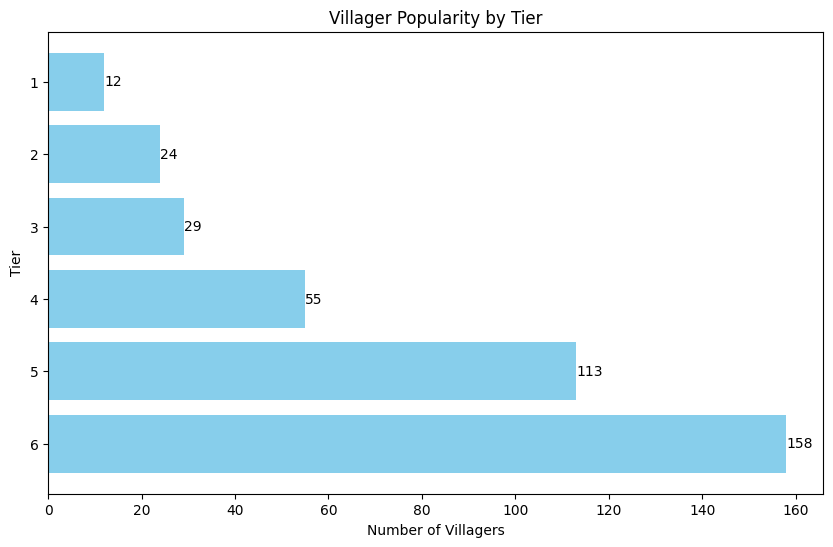

In [54]:
# Count the number of villagers in each tier
tier_counts = final_merged_df['Tier'].value_counts()

# Create a horizontal bar graph
plt.figure(figsize=(10,6))
bars = plt.barh(tier_counts.index, tier_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Villagers')
plt.ylabel('Tier')
plt.title('Villager Popularity by Tier')

# Display the counts on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center')

# Reverse the y-axis so top tier is at top
plt.gca().invert_yaxis()
    
# Display the plot
plt.show()

The distribution of villagers across tiers shows that the majority of villagers are in the lower tiers (Tiers 5 and 6), while fewer villagers are in the higher tiers (Tiers 1 and 2). The number of villagers increases as the tier number increases. 

## Species

Next, we'll analyze the relationship between species and popularity. To do this, we'll use the average popularity ranking for each species we calculated earlier to visualize this data using a bar plot. 

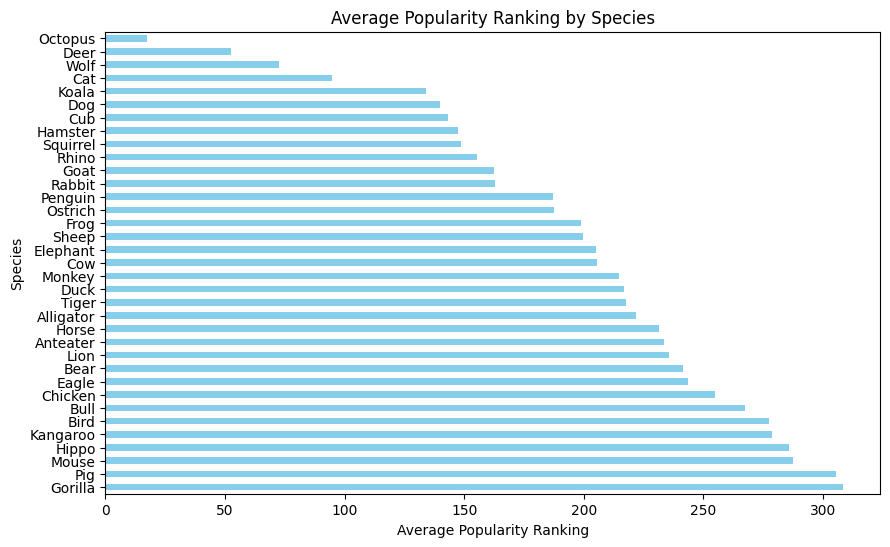

In [55]:
# plot the average popularity ranking for each species
plt.figure(figsize=(10,6))
ax = mean_popularity_species.plot(kind='barh', color='skyblue')
plt.xlabel('Average Popularity Ranking')
plt.ylabel('Species')
plt.title('Average Popularity Ranking by Species')

# invert the y-axis so most popular is at the top
ax.invert_yaxis()

plt.show()

The top 5 most popular species are the octopus, deer, wolf, cat, and koala. The 5 least popular are the kangaroo, hippo, mouse, pig, and gorilla.

## Gender

In this section, we'll look at the distribution of genders within each popularity tier to see whether there is a gender bias in the popularity of Animal Crossing villagers. We will create a horizontal bar plot to visualize the number of male and female villagers in each tier.

<Axes: ylabel='Tier,Gender'>

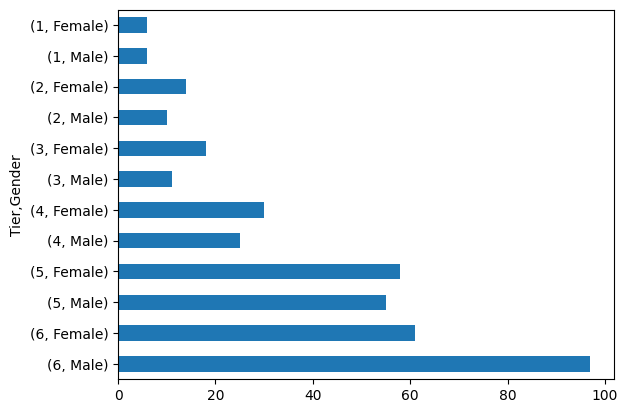

In [56]:
# show gender distribution within each popularity tier
final_merged_df.groupby('Tier').Gender.value_counts().sort_index(ascending=False).plot.barh()

There is a noticeable disproportion in the lowest tier (6th tier), where male villagers significantly outnumber female villagers. If we exclude the 6th tier, the distribution of male and female villagers across the other tiers is relatively balanced, though female villagers have a slight edge over female villagers in tiers 2 through 5.

Next, we'll create a boxplot to visualize the distribution of overall rankings for each gender. The red line represents the overall mean ranking across all villagers. This will help us understand if there are significant differences in the popularity of male and female villagers.

In [57]:
# calculate the mean (average) of the 'Overall_Ranking' column and assign it to the variable overall_mean
overall_mean = final_merged_df.Overall_Ranking.mean()

# print the calculated mean
print(f'The overall_mean is {overall_mean}.')

The overall_mean is 196.0.


<Axes: xlabel='Gender', ylabel='Overall_Ranking'>

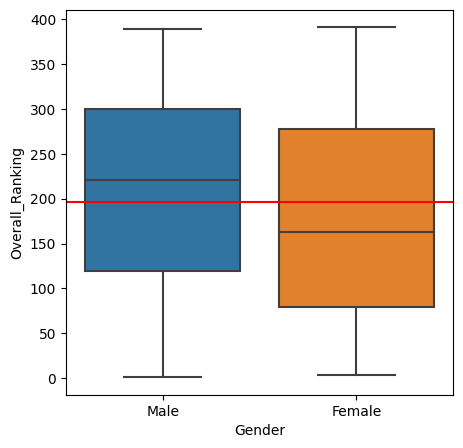

In [58]:
# create a new figure, specify size
plt.figure(figsize=(5, 5))

#draw a horizontal line at the position of the overall mean ranking
plt.axhline(overall_mean, color='r')

# create a boxplot of overall rankings, grouped by gender
sns.boxplot(x="Gender", y='Overall_Ranking', data=final_merged_df)

Female villagers typically have a higher overall ranking compared to male villagers.

## Personality

In this section, we'll analyze the relationship between personality and popularity. To do this, we'll use the average popularity ranking for each personality we calculated earlier to visualize this data using a bar plot. 

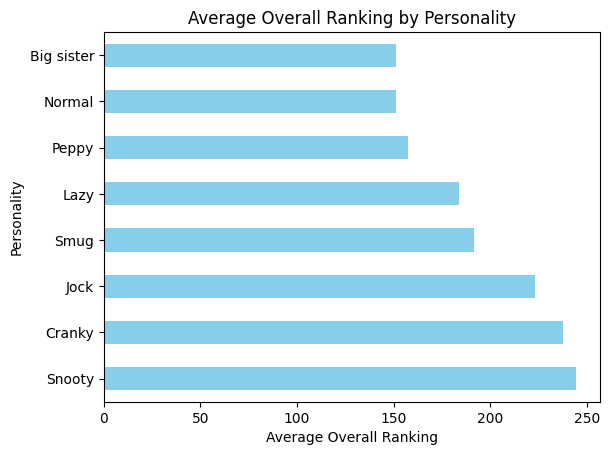

In [59]:
# create a horizontal bar plot of the average popularity by personality
ax = avg_popularity_by_personality.plot(kind='barh', color='skyblue')
plt.title('Average Overall Ranking by Personality')
plt.xlabel('Average Overall Ranking')
plt.ylabel('Personality')

# invert the y-axis so most popular is at the top
ax.invert_yaxis()

plt.show()

The playerbase seems to have a preference for villagers with Big Sister, Normal, and Peppy personalities, as indicated by their higher average overall rankings. Conversely, Cranky, Jock, and Snooty villagers tend to have lower average overall rankings, suggesting that they are less favored by the players.

In [60]:
# Create a crosstab of Tier and Personality
personality_tier_crosstab = pd.crosstab(final_merged_df['Tier'], final_merged_df['Personality'])

personality_tier_crosstab

Personality,Big sister,Cranky,Jock,Lazy,Normal,Peppy,Smug,Snooty
Tier,,,,,,,,
1,0,0,0,4,4,0,2,2
2,1,2,2,4,6,6,2,1
3,5,4,3,2,8,4,2,1
4,6,5,5,9,8,10,6,6
5,8,13,18,19,19,16,5,15
6,4,31,27,22,14,13,17,30


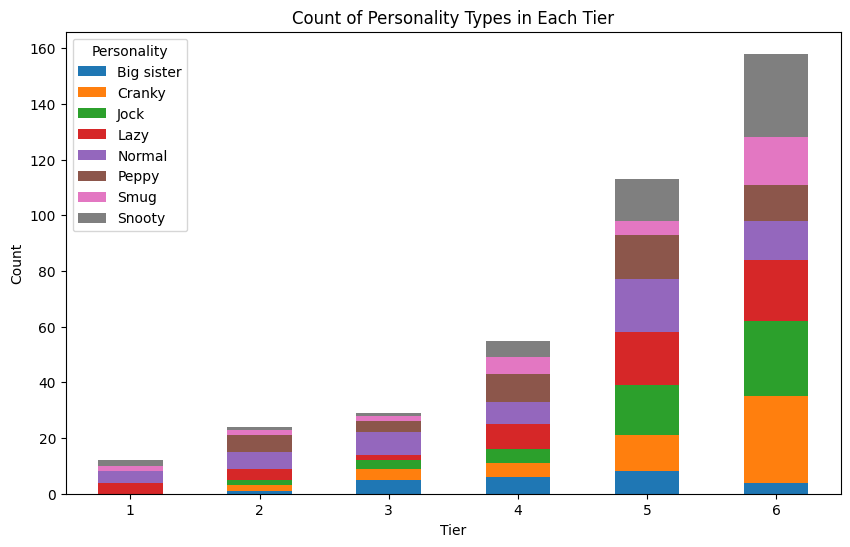

In [61]:
# Plot a stacked bar chart
personality_tier_crosstab.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Count of Personality Types in Each Tier')
plt.xlabel('Tier')
plt.ylabel('Count')

# Adjust the rotation of x-axis labels
plt.xticks(rotation=0) 

plt.show()

From the chart, we can observe that Lazy and Normal personality types are quite popular across all tiers, with a significant presence in Tiers 1 and 2, which are the top tiers. 

On the other hand, Cranky and Snooty personalities are more prevalent in the lower tiers (5 and 6), suggesting that these personality types might be less popular among players. 'Jock' and 'Smug' personalities also seem to be less favored, as they are more common in the lower tiers.

## Hobbies

In this section, we'll analyze the relationship between hobbies and popularity. To do this, we'll calculate the average popularity ranking for each hobby and visualize this data using a bar plot.

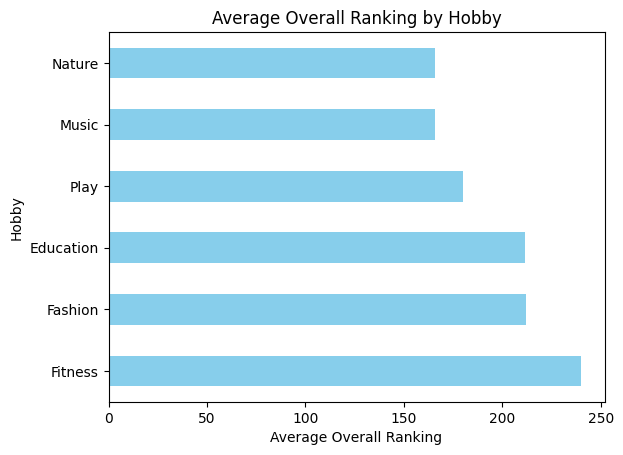

In [62]:
# Calculate average popularity by hobby
hobby_avg_ranking = final_merged_df.groupby('Hobby')['Overall_Ranking'].mean().sort_values(ascending=False)

# Plot a horizontal bar chart
hobby_avg_ranking.plot(kind='barh', color='skyblue')
plt.title('Average Overall Ranking by Hobby')
plt.xlabel('Average Overall Ranking')
plt.ylabel('Hobby')
plt.show()

The bar chart visualizes the average overall ranking for each hobby, sorted from most to least popular. Nature and Music have the highest average overall ranking, indicating that they are the hobbies that the more popular villagers have. The hobby the least popular villagers have is Fitness.

Next, we'll create a boxplot to visualize the distribution of overall rankings for each hobby. The red line represents the overall mean ranking across all villagers. 

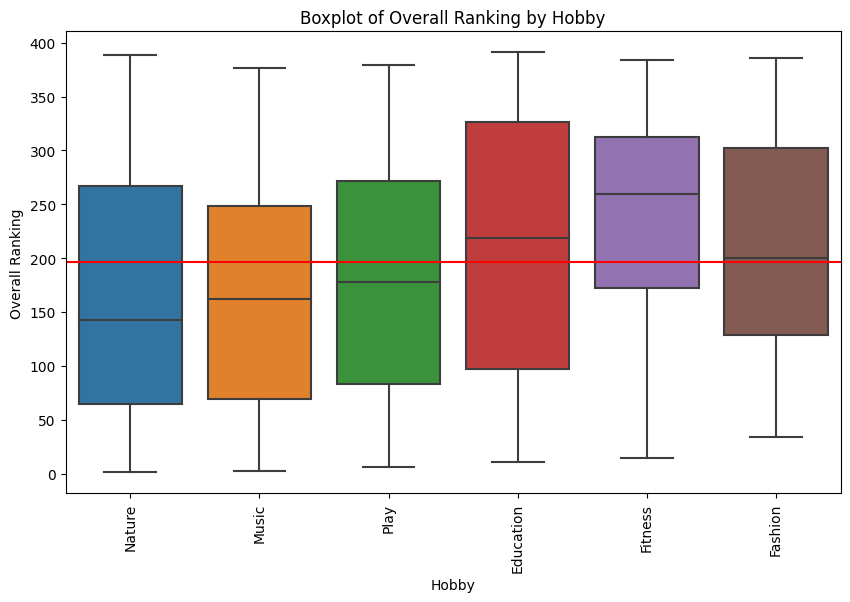

In [63]:
# create a new figure, specify size
plt.figure(figsize=(10, 6))

#draw a horizontal line at the position of the overall mean ranking
plt.axhline(overall_mean, color='r')

# create a boxplot of overall rankings, grouped by hobby
sns.boxplot(x="Hobby", y='Overall_Ranking', data=final_merged_df)
plt.title('Boxplot of Overall Ranking by Hobby')
plt.xlabel('Hobby')
plt.ylabel('Overall Ranking')
plt.xticks(rotation=90)
plt.show()

Nature, Music, and Play are typically have a higher overall ranking compared to Education, Fitness, and Fashion.

Then we'll look at the distribution of hobbies in each tier.

In [64]:
# Create a crosstab of Tier and Hobby
hobby_tier_crosstab = pd.crosstab(final_merged_df['Tier'], final_merged_df['Hobby'])
hobby_tier_crosstab 

Hobby,Education,Fashion,Fitness,Music,Nature,Play
Tier,,,,,,
1,2,0,0,3,6,1
2,5,1,2,7,3,6
3,4,3,2,6,8,6
4,10,10,4,9,10,12
5,13,27,20,19,19,15
6,30,25,38,20,20,25


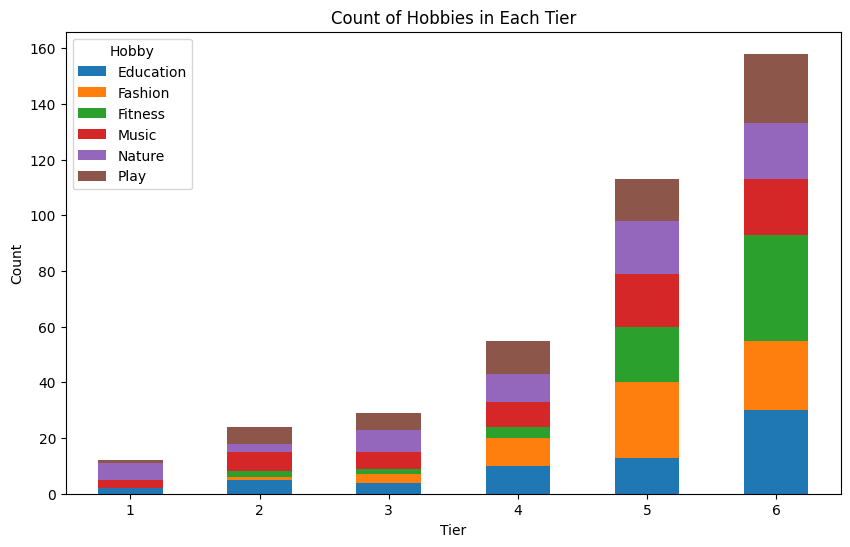

In [65]:
# Plot a stacked bar chart
hobby_tier_crosstab.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Count of Hobbies in Each Tier')
plt.xlabel('Tier')
plt.ylabel('Count')

# Adjust the rotation of x-axis labels
plt.xticks(rotation=0) 

plt.show()

Nature and Music hobbies are well-represented in the top tiers (1 and 2). On the other hand, Fitness, Education, and Play hobbies are more common in the lower tiers (5 and 6). Fashion hobby shows a balanced distribution across all tiers.

## Requests

In this section, we will create a bar graph that represents the average popularity ranking of villagers based on the category of their requests. The categories are derived from the most common words found in the villagers' requests.

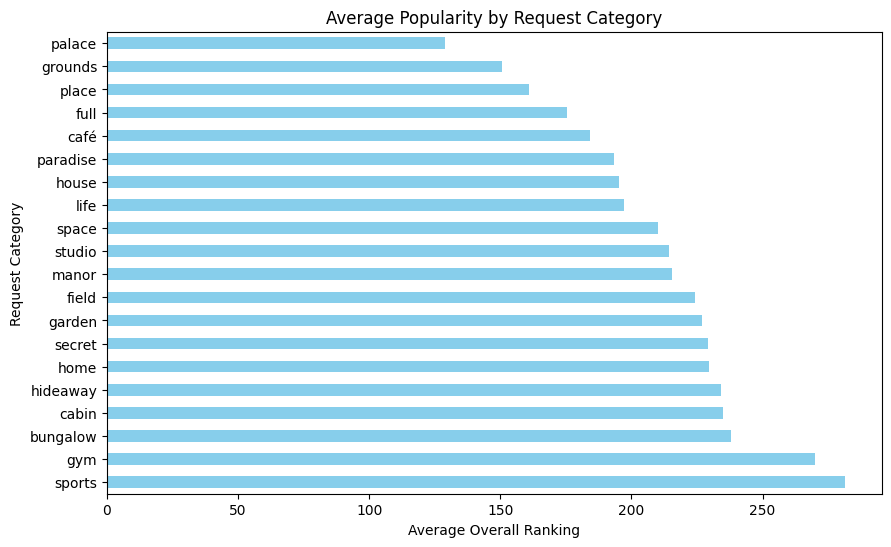

In [66]:
# Convert the dictionary to a pandas Series for easier plotting
category_popularity_series = pd.Series(category_popularity)

# Sort the series
category_popularity_series = category_popularity_series.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10,6))
category_popularity_series.plot(kind='barh', color='skyblue')

# Add labels and title
plt.xlabel('Average Overall Ranking')
plt.ylabel('Request Category')
plt.title('Average Popularity by Request Category')

# Show the plot
plt.show()

The category 'palace' has the lowest average popularity ranking, which means villagers who have requests containing the word 'palace' are, on average, the most popular. On the other hand, the category 'sports' has the highest average popularity ranking, indicating that villagers with requests containing the word 'sports' are, on average, the least popular.

It's important to note that these results are based on the assumption that the most common words in the villagers' requests are representative of the content of the requests. 

## Songs

Using the calculation of the top 10 songs based on popularity from earlier, we will plot the distribution on a bar graph.

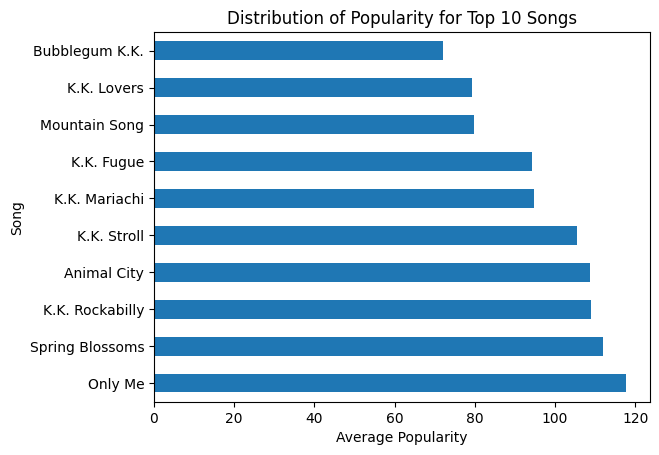

In [67]:
# Plot distribution
ax = top_10_songs.plot(kind='barh')
plt.xlabel('Average Popularity')
plt.title('Distribution of Popularity for Top 10 Songs'.format(10))

# invert the y-axis so most popular is at the top
ax.invert_yaxis()

plt.show()

"Bubblegum K.K." and "K.K. Lovers" are the most popular songs, with average popularity rankings of 72 and 79.25 respectively. This suggests that these songs are favored by the most popular villagers. On the other hand, "Only Me" and "Spring Blossoms" have the highest average popularity rankings among the top 10 songs, indicating that they are favored by less popular villagers.

# Summary of Findings

## Species
The species of a villager appears to have a significant impact on their popularity. The Octopus species stands out as the most popular, with the highest average popularity ranking and the highest proportion of villagers in the top tier. The Deer, Wolf, Cat, and Koala species also tend to be more popular, with high average popularity rankings.

On the other hand, the Gorilla, Pig, Mouse, Hippo, and Kangaroo species are generally less popular, with low average popularity rankings and little to no presence in the top tier.

There is also a notable variation in popularity within some species. For instance, the Goat species has the widest range of popularity rankings, indicating a significant disparity in popularity among its villagers.

These findings suggest that the species of a villager is a key factor influencing their popularity among players.

## Gender
The gender of a villager does seem to have an impact on their popularity. Female villagers are generally more popular than male villagers, as indicated by their lower average popularity ranking. However, the variation in popularity rankings is slightly wider for female villagers, suggesting a broader range of popularity levels within this group.

While there are more male villagers overall, they are disproportionately represented in the lowest popularity tier. This suggests that male villagers are more likely to be less popular among players.

These findings suggest that gender is a factor that can influence a villager's popularity, with female villagers tending to be more popular overall.

## Personality
The personality of a villager appears to significantly influence their popularity. Villagers with 'Big Sister', 'Normal', and 'Peppy' personalities tend to be more popular, as indicated by their lower average popularity rankings and their higher presence in the top popularity tiers.

On the other hand, villagers with 'Cranky', 'Jock', and 'Snooty' personalities are generally less popular, with higher average popularity rankings and a greater presence in the lower popularity tiers.

'Lazy' personality type is quite common and has a mixed popularity, with a significant presence across all tiers.

These findings suggest that the personality of a villager is a key factor in determining their popularity among players.

## Hobbies
The hobby of a villager appears to have an impact on their popularity. Villagers with 'Nature' and 'Music' hobbies are generally more popular, as indicated by their lower average popularity rankings and higher representation in the top popularity tier.

On the other hand, villagers with 'Fitness', 'Education', and 'Fashion' hobbies are generally less popular, with higher average popularity rankings and lower representation in the top popularity tier.

'Play' hobby is quite common but has a mixed popularity, with a significant presence across all tiers.

These findings suggest that the hobby of a villager is a factor in popularity among players.

## Requests
The nature of a villager's requests seems to have a correlation with their popularity. Villagers who make requests related to 'palace', 'place', and 'full' are generally more popular, as indicated by their lower average popularity rankings.

On the other hand, villagers who make requests related to 'sports' are generally less popular, with higher average popularity rankings.

Other request themes such as 'home', 'house', 'garden', 'space', 'café', 'gym', 'studio', 'paradise', 'secret', 'cabin', 'grounds', 'bungalow', 'life', 'manor', 'hideaway', and 'field' have varying levels of popularity among villagers.

These findings suggest that the content of a villager's requests could be a factor in their popularity among players.

## Songs
The song preferences of villagers appear to correlate with their popularity. Villagers who favor songs like "Bubblegum K.K." and "K.K. Lovers" tend to be more popular, as these songs have the lowest average popularity rankings. Conversely, villagers who favor songs like "Only Me" and "Spring Blossoms" tend to be less popular, as these songs have the highest average popularity rankings among the top 10 songs. This suggests that the song preferences of villagers could be a factor in their popularity among players.